<a href="https://colab.research.google.com/github/katejaswini/Visualising-World-Happiness-Report/blob/main/Visualising_World_Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualising World Happiness Report, 2018 - 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df2019 = pd.read_csv("/content/2019.csv")
df2018 = pd.read_csv("/content/2018.csv")

df2018 = df2018.assign(Year=2018)
df2019 = df2019.assign(Year=2019)
happiness = pd.concat([df2019.assign(Year=2019), df2018.assign(Year=2018)], sort=False)

df2016 = pd.read_csv("/content/2016.csv")
happiness.rename(columns={'Country or region': 'Country'}, inplace=True)
region_dict = df2016.set_index('Country')['Region'].to_dict()
happiness['Region'] = happiness['Country'].map(region_dict)


# Create a dictionary with appropriate region names for the missing countries
region_dict = {
    'Trinidad & Tobago': 'Latin America and Caribbean',
    'Northern Cyprus': 'Middle East and Northern Africa',
    'North Macedonia': 'Central and Eastern Europe',
    'Gambia': 'Sub-Saharan Africa',
    'Mozambique': 'Sub-Saharan Africa',
    'Swaziland': 'Sub-Saharan Africa',
    'Lesotho': 'Sub-Saharan Africa',
    'Central African Republic': 'Sub-Saharan Africa'
}
# Use the map() method to modify the Region column
happiness['Region'] = happiness['Region'].fillna(happiness['Country'].map(region_dict))

happiness.head()

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,Western Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,Western Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,Western Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,Western Europe


In [ ]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country                       312 non-null    object 
 2   Score                         312 non-null    float64
 3   GDP per capita                312 non-null    float64
 4   Social support                312 non-null    float64
 5   Healthy life expectancy       312 non-null    float64
 6   Freedom to make life choices  312 non-null    float64
 7   Generosity                    312 non-null    float64
 8   Perceptions of corruption     311 non-null    float64
 9   Year                          312 non-null    int64  
 10  Region                        312 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 29.2+ KB


In [ ]:
happiness.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,311.000000,312.000000
mean,78.500000,5.391506,0.898298,1.211026,0.661295,0.423538,0.182926,0.111299,2018.500000
std,45.104737,1.114631,0.394592,0.300310,0.252724,0.156024,0.096739,0.095365,0.500803
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000
25%,39.750000,4.514250,0.609500,1.055750,0.488250,0.322500,0.108750,0.050000,2018.000000
50%,78.500000,5.379500,0.960000,1.265500,0.699000,0.449500,0.175500,0.082000,2018.500000
75%,117.250000,6.176000,1.219500,1.457500,0.858000,0.540250,0.245000,0.140500,2019.000000
max,156.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.598000,0.457000,2019.000000


Finding the highest and lowest score of happiness among the countries

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


# Finding the countries with the highest and lowest happiness scores
highest_happiness = happiness[happiness['Score'] == happiness['Score'].max()][['Country', 'Score']]
lowest_happiness = happiness[happiness['Score'] == happiness['Score'].min()][['Country', 'Score']]

print("\nHighest Happy:\n", highest_happiness)
print("\nLowest Happy:\n", lowest_happiness)


Highest Happy:
    Country  Score
0  Finland  7.769

Lowest Happy:
          Country  Score
155  South Sudan  2.853


In [ ]:
# Selecting only numeric columns
numeric_df = happiness.select_dtypes(include=[np.number])
# Calculating Correlations for a Variable"Score"
correlation = numeric_df.corr()['Score']
print(correlation)

Overall rank                   -0.990325
Score                           1.000000
GDP per capita                  0.797977
Social support                  0.761080
Healthy life expectancy         0.755875
Freedom to make life choices    0.539897
Generosity                      0.106645
Perceptions of corruption       0.395319
Year                            0.014009
Name: Score, dtype: float64


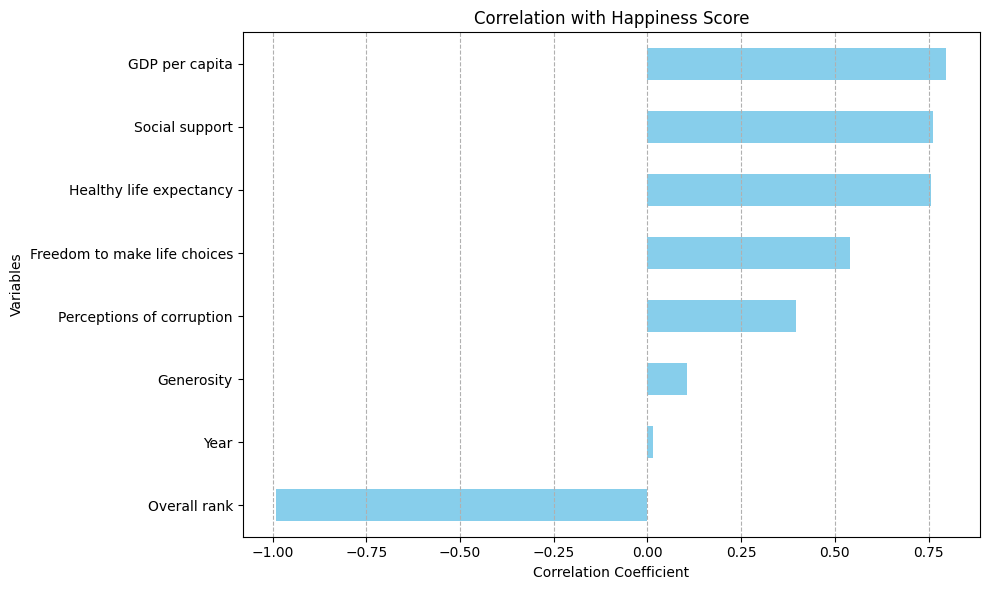

In [ ]:
# Compute the correlation coefficients
correlation = numeric_df.corr()['Score'].drop('Score')  # Dropping the 'Score' column since it's a self-correlation

# Plotting
plt.figure(figsize=(10, 6))
correlation.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation with Happiness Score')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

<Axes: xlabel='Score', ylabel='Country'>

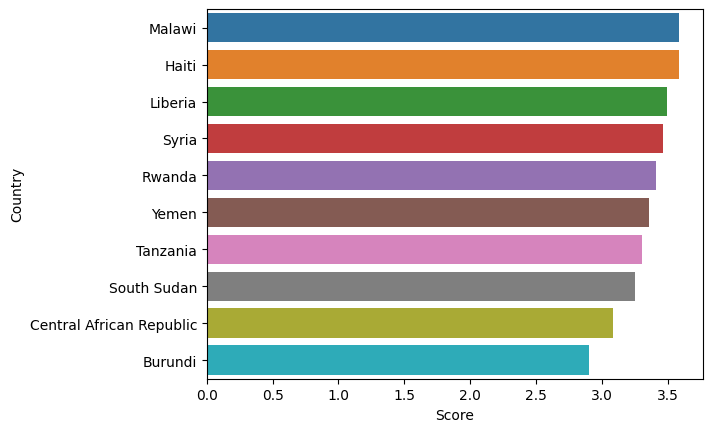

In [ ]:
sns.barplot(y = happiness['Country'][-10:], x = happiness['Score'][-10:] )

In [ ]:
happiness_top10_2018 = happiness_2018.sort_values('Score', ascending=False).head(10)
happiness_top10_2019 = happiness_2019.sort_values('Score', ascending=False).head(10)

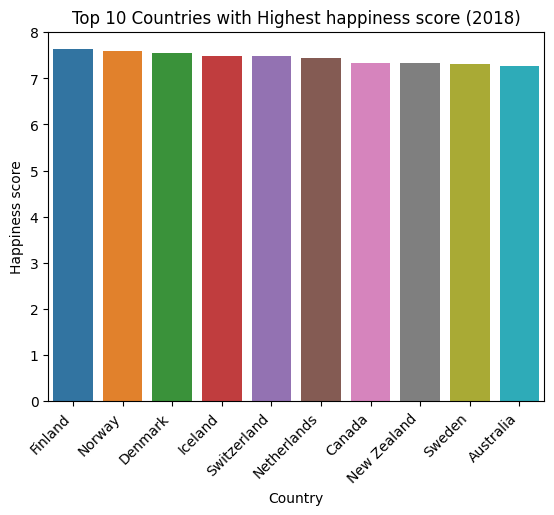

In [ ]:
sns.barplot(data=happiness_top10_2018, x='Country', y='Score')

plt.title('Top 10 Countries with Highest happiness score (2018)')
plt.xlabel('Country')
plt.ylabel('Happiness score')

plt.xticks(rotation=45, ha='right')

plt.show()

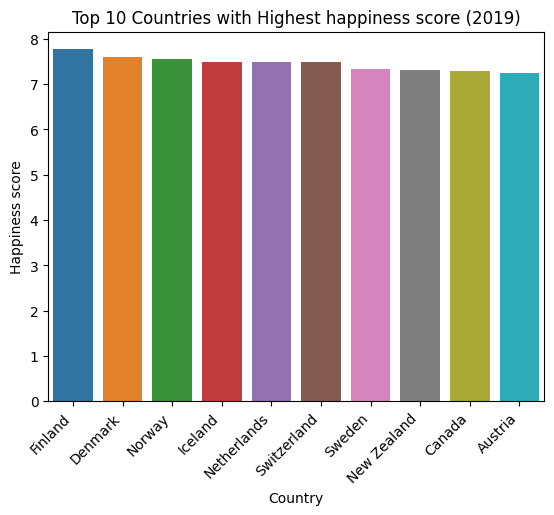

In [ ]:
sns.barplot(data=happiness_top10_2019, x='Country', y='Score')

plt.title('Top 10 Countries with Highest happiness score (2019)')
plt.xlabel('Country')
plt.ylabel('Happiness score')

plt.xticks(rotation=45, ha='right')

plt.show()

For the next visualisations, we need happiness data for 2018 to be separate from 2019 happiness data, then make the visualisations side by side.

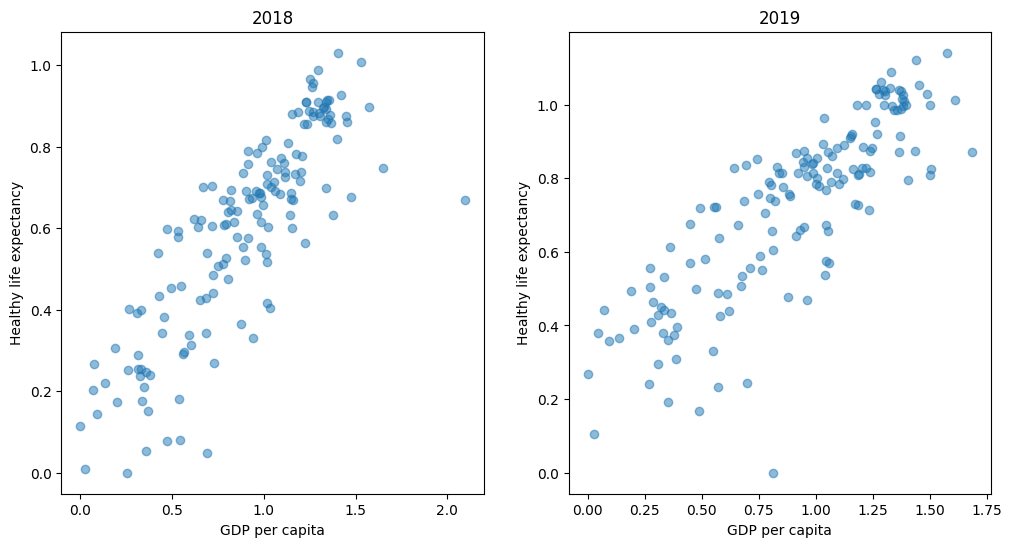

In [ ]:
# Make two new dataframes with 2018 and 2019 happiness data
happiness_2018 = happiness[happiness['Year'] == 2018]
happiness_2019 = happiness[happiness['Year'] == 2019]
# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot scatterplot for 2018 data
ax1.scatter(happiness_2018['GDP per capita'], happiness_2018['Healthy life expectancy'], alpha=0.5)
ax1.set_title('2018')
ax1.set_xlabel('GDP per capita')
ax1.set_ylabel('Healthy life expectancy')

# Plot scatterplot for 2019 data
ax2.scatter(happiness_2019['GDP per capita'], happiness_2019['Healthy life expectancy'], alpha=0.5)
ax2.set_title('2019')
ax2.set_xlabel('GDP per capita')
ax2.set_ylabel('Healthy life expectancy')
plt.show()

 Plots to add bubble sizes equal to the total happiness score for each country

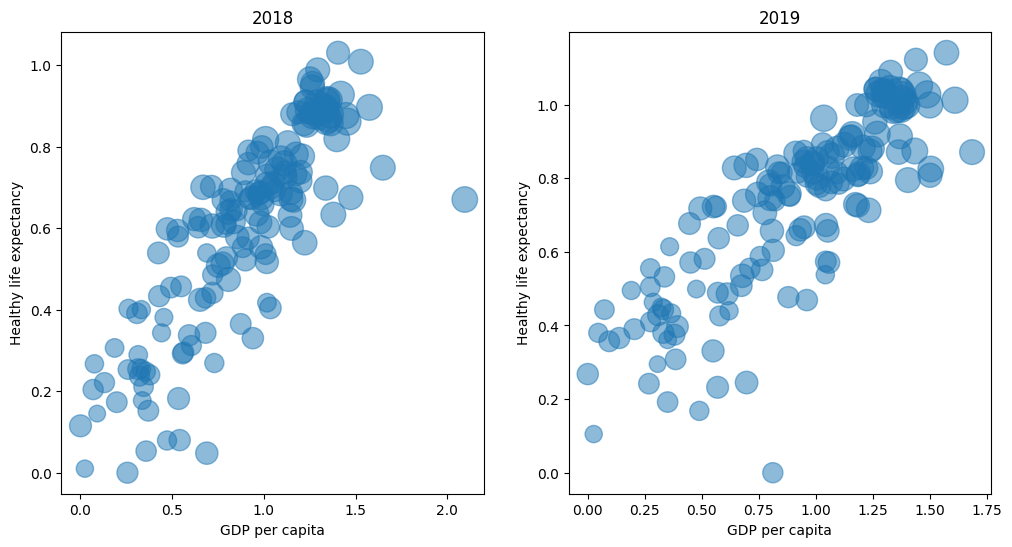

In [ ]:
# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot scatterplot for 2018 data
ax1.scatter(happiness_2018['GDP per capita'], happiness_2018['Healthy life expectancy'], alpha=0.5, s=happiness_2018['Score']*50)
ax1.set_title('2018')
ax1.set_xlabel('GDP per capita')
ax1.set_ylabel('Healthy life expectancy')

# Plot scatterplot for 2019 data
ax2.scatter(happiness_2019['GDP per capita'], happiness_2019['Healthy life expectancy'], alpha=0.5, s=happiness_2019['Score']*50)
ax2.set_title('2019')
ax2.set_xlabel('GDP per capita')
ax2.set_ylabel('Healthy life expectancy')

# Display the plot
plt.show()


The bubbles are mostly of similar size, so the result is not very interesting. Let's modify the plots to set bubble size equal to Perceptions of corruption instead

Now let us introduce some colour to the plot by setting the color legend to the Region

<ipython-input-18-57838a13a629>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(data['GDP per capita'], data['Healthy life expectancy'], alpha=0.5, s=data['Perceptions of corruption']*500,
<ipython-input-18-57838a13a629>:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(data['GDP per capita'], data['Healthy life expectancy'], alpha=0.5, s=data['Perceptions of corruption']*500,


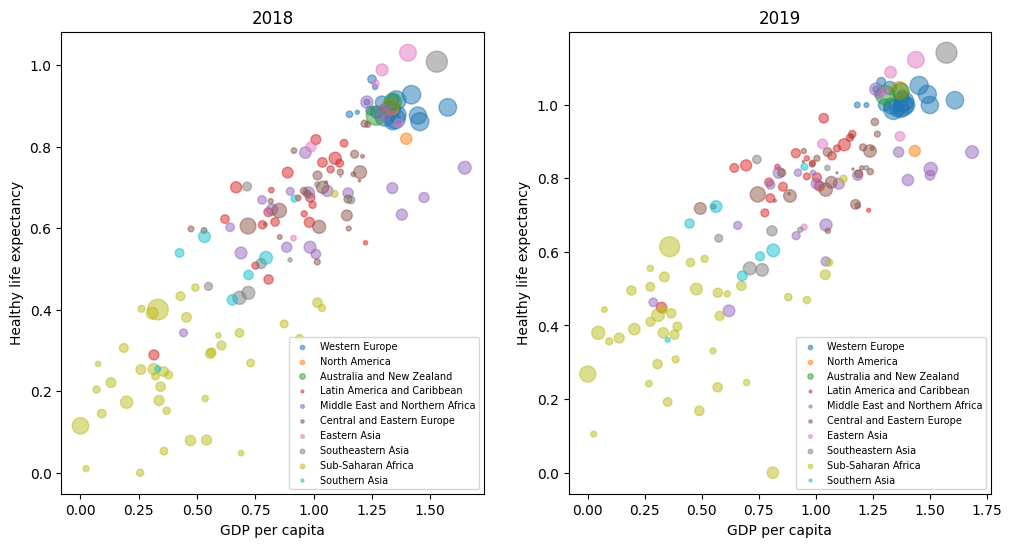

In [ ]:
# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Define color map and region list
cmap = plt.get_cmap('tab20')
region_list = list(happiness_2018['Region'].unique())

# Plot scatterplot for 2018 data
for region in region_list:
    data = happiness_2018[happiness_2018['Region'] == region]
    ax1.scatter(data['GDP per capita'], data['Healthy life expectancy'], alpha=0.5, s=data['Perceptions of corruption']*500,
                label=region, cmap=cmap)
ax1.set_title('2018')
ax1.set_xlabel('GDP per capita')
ax1.set_ylabel('Healthy life expectancy')
ax1.legend(fontsize=7, markerscale=0.3)
# Plot scatterplot for 2019 data
for region in region_list:
    data = happiness_2019[happiness_2019['Region'] == region]
    ax2.scatter(data['GDP per capita'], data['Healthy life expectancy'], alpha=0.5, s=data['Perceptions of corruption']*500,
                label=region, cmap=cmap)
ax2.set_title('2019')
ax2.set_xlabel('GDP per capita')
ax2.set_ylabel('Healthy life expectancy')
ax2.legend(fontsize=7, markerscale=0.3)

# Display the plot
plt.show()

Adding interactivity to the plots using Plotly

Healthy life expectancy, perceptions of corruption, and GDP per capita

In [ ]:
# Drop the rows with missing values
happiness_2018 = happiness_2018.dropna(subset=['Perceptions of corruption'])

# Create figure and axes
fig = px.scatter(happiness_2018, x='GDP per capita', y='Healthy life expectancy', color='Region', size='Perceptions of corruption', hover_name='Country',
                 hover_data={'Region': True, 'Score': ':.2f', 'GDP per capita': ':.2f', 'Healthy life expectancy': ':.2f'})

# Update the size of the region label
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01,
    font=dict(size=12)
))

# Display the plot
fig.show()


Below are some boxplots showing the distribution of GDP per capita by region.

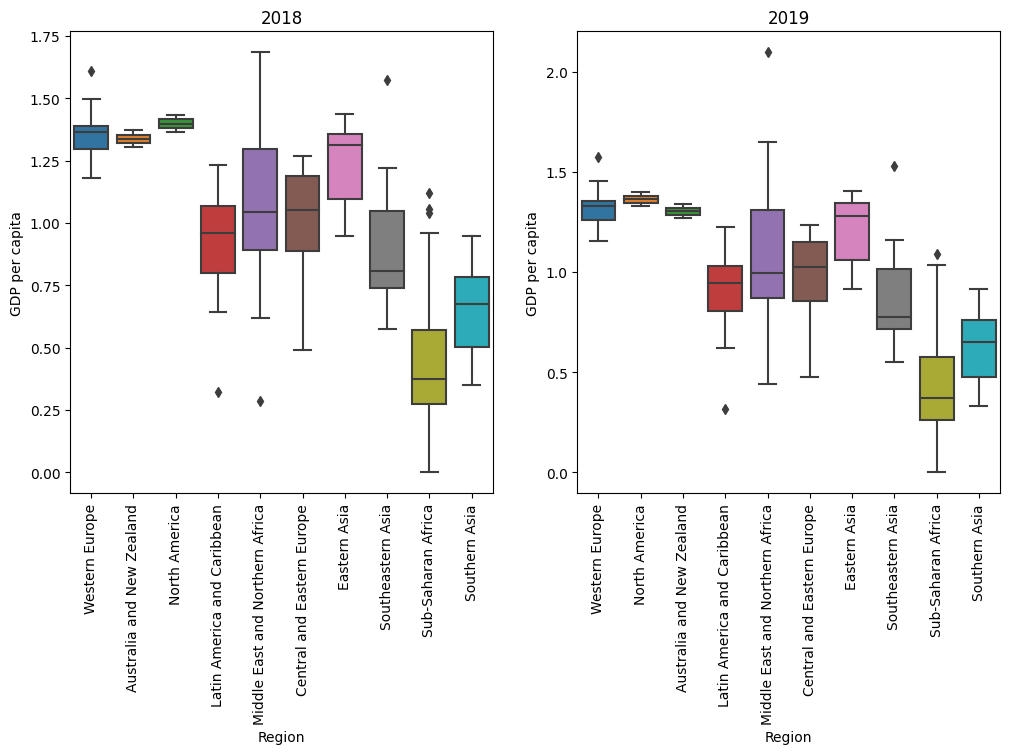

In [ ]:
# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot boxplot for 2018 data
sns.boxplot(x='Region', y='GDP per capita', data=happiness_2018, ax=ax1)
ax1.set_title('2018')
ax1.set_ylabel('GDP per capita')
ax1.set_xlabel('Region')
ax1.tick_params(axis='x', rotation=90)

# Plot boxplot for 2019 data
sns.boxplot(x='Region', y='GDP per capita', data=happiness_2019, ax=ax2)
ax2.set_title('2019')
ax2.set_ylabel('GDP per capita')
ax2.set_xlabel('Region')
ax2.tick_params(axis='x', rotation=90)

# Display the plot
plt.show()


correlation heatmap showing relationships between the numerical columns of the dataset

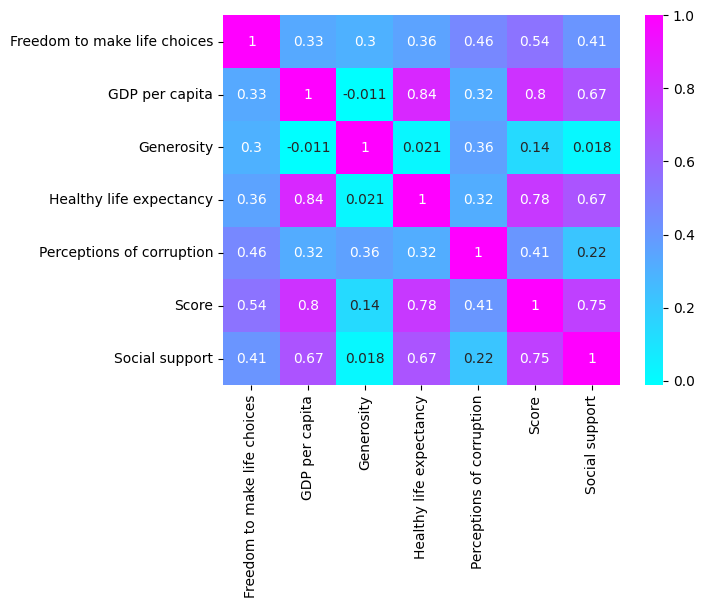

In [ ]:
# Select the columns to include in the correlation matrix
cols_to_include = happiness_2019.columns.difference(['Overall rank', 'Country', 'Year', 'Region'])

# Compute the correlation matrix
corr_matrix = happiness_2019[cols_to_include].corr()

# Create the heatmap
sns.heatmap(corr_matrix, cmap='cool', annot=True)

# Show the plot
plt.show()


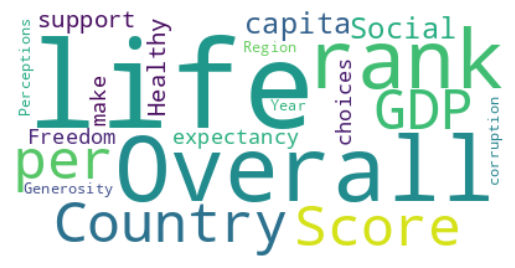

In [ ]:
from wordcloud import WordCloud
# Get column names of the dataset
column_names = happiness.columns.tolist()
# Create a word cloud plot of the column names
wordcloud = WordCloud(background_color='white').generate(' '.join(column_names))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Table visualisation showing happiness scores for 2019 by region

In [ ]:
region_gdp = happiness_2019.groupby('Region')['GDP per capita'].mean().reset_index()
region_gdp

,Region,GDP per capita
0,Australia and New Zealand,1.304000
1,Central and Eastern Europe,0.989345
2,Eastern Asia,1.205500
3,Latin America and Caribbean,0.901318
4,Middle East and Northern Africa,1.088550
5,North America,1.364000
6,Southeastern Asia,0.894000
7,Southern Asia,0.625143
8,Sub-Saharan Africa,0.442846
9,Western Europe,1.325650


Clustered bar chart visualising happiness for both years by region

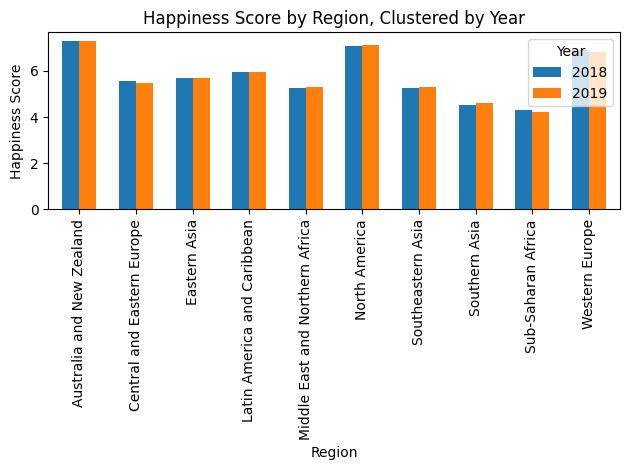

In [ ]:
# Create a pivot table of happiness score by region and year
happiness_pivot = happiness.pivot_table(values='Score', index='Region', columns='Year')

# Create a bar chart of happiness score by region, clustered by year
happiness_pivot.plot(kind='bar', width=0.6)
plt.title('Happiness Score by Region, Clustered by Year')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

clustered chart more interactive using Plotly

In [ ]:
# Create a pivot table of happiness score by region and year
happiness_pivot = happiness.pivot_table(values='Score', index='Region', columns='Year')

# Create a bar chart of happiness score by region, clustered by year
fig = px.bar(happiness_pivot, barmode='group')

fig.update_layout(title='Happiness Score by Region, Clustered by Year',
                  xaxis_title='Region',
                  yaxis_title='Happiness Score',
                  legend_title='Year')

fig.update_traces(hovertemplate='Region: %{x}<br>Year: %{customdata[0]}<br>Happiness Score: %{y}')

fig.show()


Map visualisation showing GDP per capita plus tooltips

In [ ]:
fig = px.choropleth(
    happiness,
    locations="Country",
    locationmode="country names",
    color="GDP per capita",
    color_continuous_scale="Viridis",
    title="GDP per Capita by Country",
    labels={"GDP per capita": "GDP per Capita"},
    hover_name="Country",
    hover_data={
        "Country": False,  # To keep the country name in the tooltip
        "Overall rank": True,
        "Score": True,
        "Social support": True,
        "Healthy life expectancy": True
    },
    projection="natural earth"
)

fig.update_geos(showcoastlines=True, coastlinecolor="black", showland=True, landcolor="white")
fig.show()

Visualising Healthy life expectancy by freedom levels per country using bubble map

In [ ]:
fig = px.scatter_geo(
    happiness,
    locations="Country",
    locationmode="country names",
    size="Healthy life expectancy",
    color="Freedom to make life choices",
    hover_name="Country",
    title="Healthy Life Expectancy by Country",
    size_max=20,
    projection="natural earth",
    color_continuous_scale="Viridis"
)

fig.update_geos(showcoastlines=True, coastlinecolor="black", showland=True, landcolor="white")

fig.show()